In [1]:
import os
import tarfile
from six.moves import urllib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as spy
import sklearn as skl

## Collecting data from web

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
#fetch_housing_data()

## Reading data 

In [3]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()

### Viewing data

In [4]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

<IPython.core.display.Javascript object>


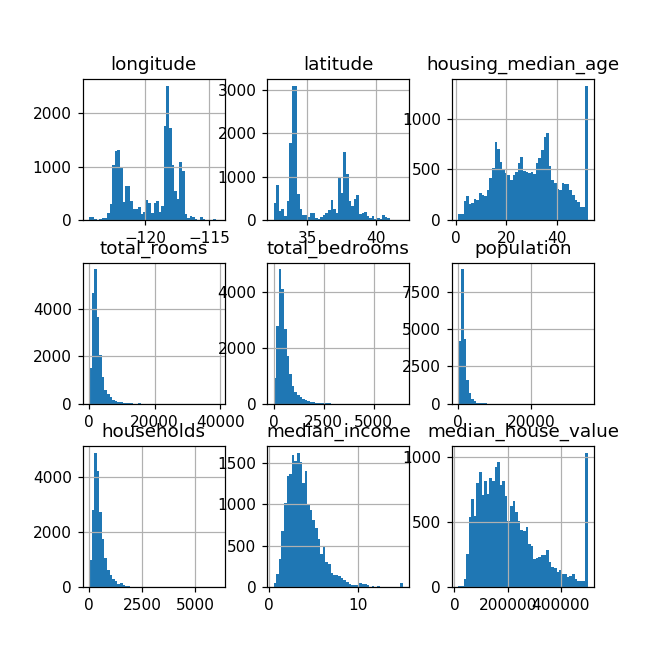

In [7]:
%matplotlib notebook
housing.hist(bins = 50, figsize=(6, 6))
plt.show()

## Setting train/test sets

### Random samplig

In [8]:
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]
housing_with_id = housing.reset_index()
housing_with_id['id'] = housing['longitude']*1000 + housing['latitude'] 
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### Stratified sampling (best way, since it avoids sampling bias)

In [10]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

In [11]:
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace = True)

In [12]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   income_cat  
0         5.0  
1         5.0  
2         5.0  
3         4.0  
4         3.0

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241     -118.39     34.12                29.0       6447.0          1012.0   
10970    -117.86     33.77                39.0       4159.0           655.0   
20351    -119.05     34.21                27.0       4357.0           926.0   
6568     -118.15     34.20                52.0       1786.0           306.0   
13285    -117.68     34.07                32.0       1775.0           314.0   
...          ...       ...                 ...          ...             ...   
20519    -121.53     38.58                33.0       4988.0          1169.0   
17430    -120.44     34.65                30.0       2265.0           512.0   
4019     -118.49     34.18                31.0       3073.0           674.0   
12107    -117.32     33.99                27.0       5464.0           850.0   
2398     -118.91     36.79                19.0       1616.0           324.0   

       population  households  median_income  median_house_value  \
5241       2184.0       960.0         8.2816            500001.0   
10970      1669.0       651.0         4.6111            240300.0   
20351      2110.0       876.0         3.0119            218200.0   
6568       1018.0       322.0         4.1518            182100.0   
13285      1067.0       302.0         4.0375            121300.0   
...           ...         ...            ...                 ...   
20519      2414.0      1075.0         1.9728             76400.0   
17430      1402.0       471.0         1.9750            134000.0   
4019       1486.0       684.0         4.8984            311700.0   
12107      2400.0       836.0         4.7110            133500.0   
2398        187.0        80.0         3.7857             78600.0   

      ocean_proximity  income_cat  
5241        <1H OCEAN         5.0  
10970       <1H OCEAN         4.0  
20351       <1H OCEAN         3.0  
6568           INLAND         3.0  
13285          INLAND         3.0  
...               ...         ...  
20519          INLAND         2.0  
17430      NEAR OCEAN         2.0  
4019        <1H OCEAN         4.0  
12107          INLAND         4.0  
2398           INLAND         3.0  

[4128 rows x 11 columns]

In [15]:
strat_test_set

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241     -118.39     34.12                29.0       6447.0          1012.0   
10970    -117.86     33.77                39.0       4159.0           655.0   
20351    -119.05     34.21                27.0       4357.0           926.0   
6568     -118.15     34.20                52.0       1786.0           306.0   
13285    -117.68     34.07                32.0       1775.0           314.0   
...          ...       ...                 ...          ...             ...   
20519    -121.53     38.58                33.0       4988.0          1169.0   
17430    -120.44     34.65                30.0       2265.0           512.0   
4019     -118.49     34.18                31.0       3073.0           674.0   
12107    -117.32     33.99                27.0       5464.0           850.0   
2398     -118.91     36.79                19.0       1616.0           324.0   

       population  households  median_income  median_house_value  \
5241       2184.0       960.0         8.2816            500001.0   
10970      1669.0       651.0         4.6111            240300.0   
20351      2110.0       876.0         3.0119            218200.0   
6568       1018.0       322.0         4.1518            182100.0   
13285      1067.0       302.0         4.0375            121300.0   
...           ...         ...            ...                 ...   
20519      2414.0      1075.0         1.9728             76400.0   
17430      1402.0       471.0         1.9750            134000.0   
4019       1486.0       684.0         4.8984            311700.0   
12107      2400.0       836.0         4.7110            133500.0   
2398        187.0        80.0         3.7857             78600.0   

      ocean_proximity  income_cat  
5241        <1H OCEAN         5.0  
10970       <1H OCEAN         4.0  
20351       <1H OCEAN         3.0  
6568           INLAND         3.0  
13285          INLAND         3.0  
...               ...         ...  
20519          INLAND         2.0  
17430      NEAR OCEAN         2.0  
4019        <1H OCEAN         4.0  
12107          INLAND         4.0  
2398           INLAND         3.0  

[4128 rows x 11 columns]

## Comparing proportions error on data (random vs stratified)

### Preprocessing a lil bit

In [16]:
stratified = (strat_test_set['income_cat'].value_counts()/len(strat_test_set)).sort_index()

In [17]:
overall = (housing['income_cat'].value_counts()/len(housing)).sort_index()

In [18]:
housing_with_id["income_cat"] = np.ceil(housing_with_id["median_income"] / 1.5)
housing_with_id['income_cat'].where(housing_with_id['income_cat'] < 5, 5.0, inplace = True)

In [19]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_with_id, test_size=0.2, random_state=42)

In [20]:
random = (test_set['income_cat'].value_counts()/len(test_set)).sort_index()

In [21]:
d = {'Overall': overall, 'Random': random, 'Stratified': stratified}
df = pd.DataFrame(d)
df

Overall    Random  Stratified
1.0  0.039826  0.040213    0.039729
2.0  0.318847  0.324370    0.318798
3.0  0.350581  0.358527    0.350533
4.0  0.176308  0.167393    0.176357
5.0  0.114438  0.109496    0.114583

In [22]:
df['Rand. %error'] = (df['Random']-df['Overall'])*100/df['Overall']
df['Strat. %error'] = (df['Stratified']-df['Overall'])*100/df['Overall']

### Comparative table

In [23]:
df

Overall    Random  Stratified  Rand. %error  Strat. %error
1.0  0.039826  0.040213    0.039729      0.973236      -0.243309
2.0  0.318847  0.324370    0.318798      1.732260      -0.015195
3.0  0.350581  0.358527    0.350533      2.266446      -0.013820
4.0  0.176308  0.167393    0.176357     -5.056334       0.027480
5.0  0.114438  0.109496    0.114583     -4.318374       0.127011

In [24]:
for set in (strat_test_set, strat_train_set):
    set.drop(['income_cat'], axis = 1, inplace = True)

Here we deleted the income_cat column, since we don't need it anymore. Data is already splitted (stratified splitted :D) so we continue working with the training data from now on. 

### Saving train & test data into csv's

In [25]:
cwd = os.getcwd()
BASE_DIR = os.path.dirname(cwd)
TRAIN_TEST_DIR = os.path.join(BASE_DIR, 'Machine Learning\\CH02\\datasets\\housing')
os.makedirs(TRAIN_TEST_DIR, exist_ok=True)
TRAIN_PATH = os.path.join(TRAIN_TEST_DIR, 'strat-train-set.csv')
TEST_PATH = os.path.join(TRAIN_TEST_DIR, 'strat-test-set.csv')
strat_train_set.to_csv(TRAIN_PATH, index=False)
strat_test_set.to_csv(TEST_PATH, index = False)

## Exploring the data!

In [24]:
housing = strat_train_set.copy()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  median_house_value  \
17606       710.0       339.0         2.7042            286600.0   
18632       306.0       113.0         6.4214            340600.0   
14650       936.0       462.0         2.8621            196900.0   
3230       1460.0       353.0         1.8839             46300.0   
3555       4459.0      1463.0         3.0347            254500.0   

      ocean_proximity  
17606       <1H OCEAN  
18632       <1H OCEAN  
14650      NEAR OCEAN  
3230           INLAND  
3555        <1H OCEAN

<IPython.core.display.Javascript object>


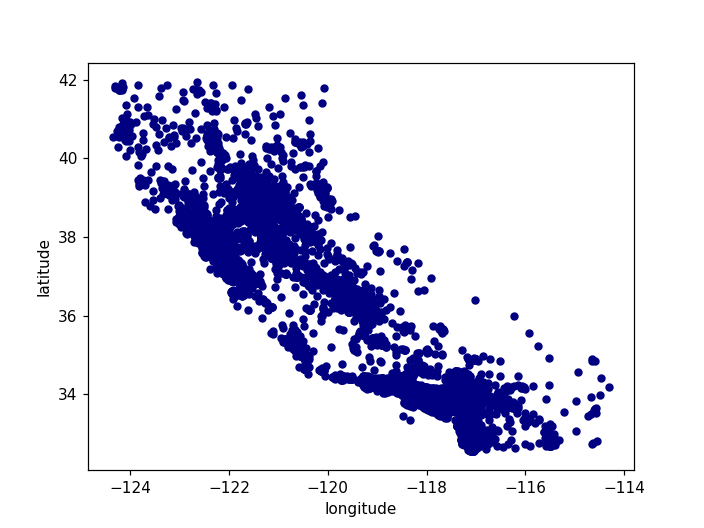

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

In [61]:
%matplotlib notebook
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', c = 'navy')

<IPython.core.display.Javascript object>


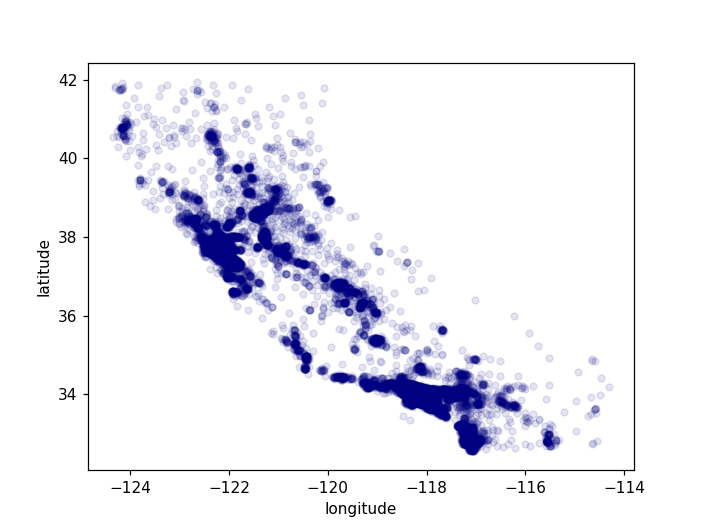

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

In [62]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', c = 'navy', alpha = 0.1)

<IPython.core.display.Javascript object>


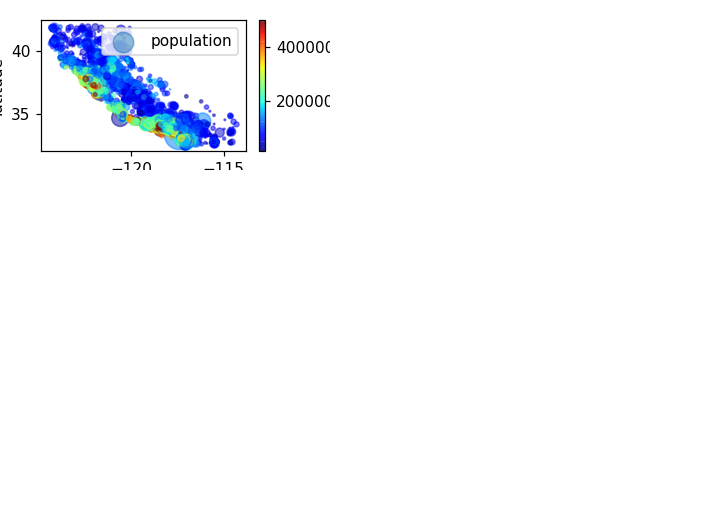

In [27]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', 
            alpha = 0.5, 
            s = housing['population']/100, label = 'population',
            c = 'median_house_value', cmap = plt.get_cmap('jet'),
            colorbar = True)
plt.legend()

### Looking for correlations

In [28]:
corr_matrix = housing.corr()
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105848     0.048871   
latitude            -0.924478  1.000000            0.005766    -0.039184   
housing_median_age  -0.105848  0.005766            1.000000    -0.364509   
total_rooms          0.048871 -0.039184           -0.364509     1.000000   
total_bedrooms       0.076598 -0.072419           -0.325047     0.929379   
population           0.108030 -0.115222           -0.298710     0.855109   
households           0.063070 -0.077647           -0.306428     0.918392   
median_income       -0.019583 -0.075205           -0.111360     0.200087   
median_house_value  -0.047432 -0.142724            0.114110     0.135097   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076598    0.108030    0.063070      -0.019583   
latitude                 -0.072419   -0.115222   -0.077647      -0.075205   
housing_median_age       -0.325047   -0.298710   -0.306428      -0.111360   
total_rooms               0.929379    0.855109    0.918392       0.200087   
total_bedrooms            1.000000    0.876320    0.980170      -0.009740   
population                0.876320    1.000000    0.904637       0.002380   
households                0.980170    0.904637    1.000000       0.010781   
median_income            -0.009740    0.002380    0.010781       1.000000   
median_house_value        0.047689   -0.026920    0.064506       0.687160   

                    median_house_value  
longitude                    -0.047432  
latitude                     -0.142724  
housing_median_age            0.114110  
total_rooms                   0.135097  
total_bedrooms                0.047689  
population                   -0.026920  
households                    0.064506  
median_income                 0.687160  
median_house_value            1.000000

In [29]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

<IPython.core.display.Javascript object>


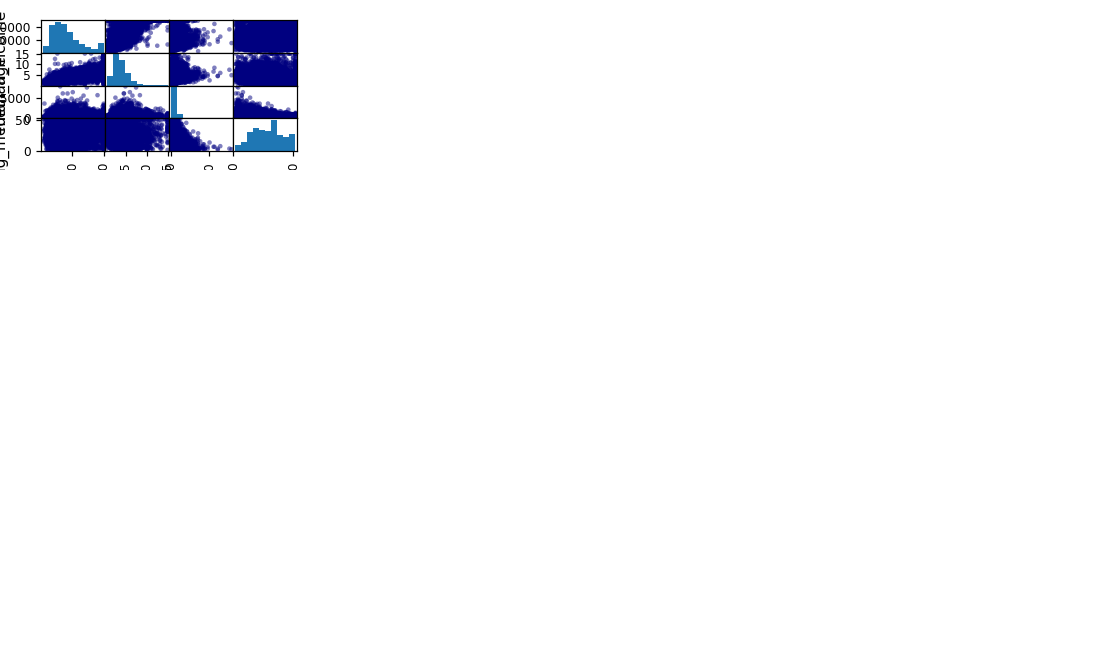

In [30]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", 
              "total_rooms", "housing_median_age"]
_ = scatter_matrix(housing[attributes], figsize=(10, 6), c = 'navy')

The most promising correlation here is the one given by the median income, so we set that apart and work on it!

<IPython.core.display.Javascript object>


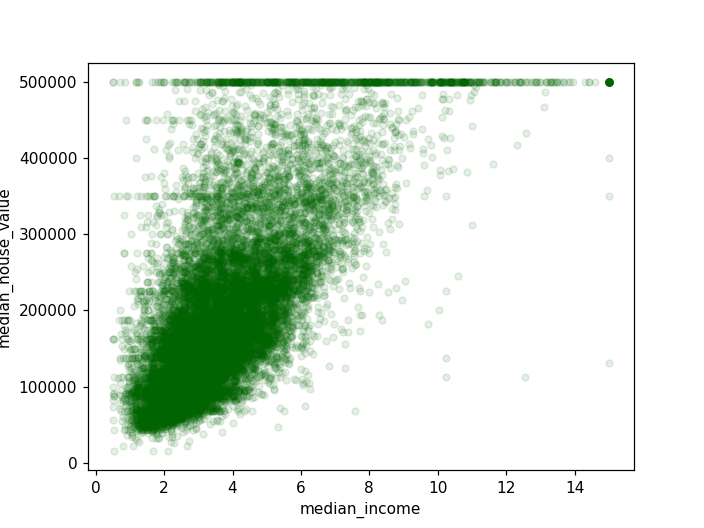

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

In [31]:
housing.plot(kind = 'scatter', x = 'median_income', 
             y = 'median_house_value', c = 'darkgreen', alpha = 0.1)

In [32]:
seeking_quirks = housing[(housing['median_house_value']>400000) 
        & (housing['median_house_value']<500000)]
seeking_quirks

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18104    -122.03     37.31                25.0       2131.0           410.0   
16131    -122.48     37.79                52.0       4683.0          1055.0   
17137    -122.16     37.46                32.0       2663.0           661.0   
18265    -122.07     37.37                22.0       3770.0           727.0   
16957    -122.31     37.52                35.0       1817.0           262.0   
...          ...       ...                 ...          ...             ...   
1565     -121.93     37.78                 2.0        227.0            35.0   
4068     -118.48     34.15                31.0       2536.0           429.0   
10328    -117.76     33.84                15.0       3764.0           510.0   
18384    -121.84     37.21                15.0       5468.0           676.0   
9801     -121.94     36.55                30.0       2722.0           584.0   

       population  households  median_income  median_house_value  \
18104      1132.0       395.0         5.3508            409100.0   
16131      2246.0       975.0         4.1148            457800.0   
17137      1403.0       733.0         4.2667            410200.0   
18265      1657.0       762.0         4.8021            457500.0   
16957       659.0       262.0         6.8336            457200.0   
...           ...         ...            ...                 ...   
1565        114.0        49.0         3.1591            434700.0   
4068        990.0       424.0         5.4591            495500.0   
10328      1448.0       468.0         8.7124            410500.0   
18384      2221.0       675.0         8.3792            418300.0   
9801        628.0       384.0         3.4048            487100.0   

      ocean_proximity  
18104       <1H OCEAN  
16131        NEAR BAY  
17137        NEAR BAY  
18265        NEAR BAY  
16957      NEAR OCEAN  
...               ...  
1565        <1H OCEAN  
4068        <1H OCEAN  
10328       <1H OCEAN  
18384       <1H OCEAN  
9801       NEAR OCEAN  

[609 rows x 10 columns]

### Trying out attributes combinations

In [33]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  median_house_value  \
17606       710.0       339.0         2.7042            286600.0   
18632       306.0       113.0         6.4214            340600.0   
14650       936.0       462.0         2.8621            196900.0   
3230       1460.0       353.0         1.8839             46300.0   
3555       4459.0      1463.0         3.0347            254500.0   

      ocean_proximity  
17606       <1H OCEAN  
18632       <1H OCEAN  
14650      NEAR OCEAN  
3230           INLAND  
3555        <1H OCEAN

In [34]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [35]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  median_house_value  \
17606       710.0       339.0         2.7042            286600.0   
18632       306.0       113.0         6.4214            340600.0   
14650       936.0       462.0         2.8621            196900.0   
3230       1460.0       353.0         1.8839             46300.0   
3555       4459.0      1463.0         3.0347            254500.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
17606       <1H OCEAN             4.625369           0.223852   
18632       <1H OCEAN             6.008850           0.159057   
14650      NEAR OCEAN             4.225108           0.241291   
3230           INLAND             5.232295           0.200866   
3555        <1H OCEAN             4.505810           0.231341   

       population_per_household  
17606                  2.094395  
18632                  2.707965  
14650                  2.025974  
3230                   4.135977  
3555                   3.047847

In [36]:
housing['bedrooms_per_room'].value_counts()

0.250000    28
0.166667    19
0.200000    18
0.181818    15
0.222222    13
            ..
0.258788     1
0.139697     1
0.200866     1
0.168614     1
0.186908     1
Name: bedrooms_per_room, Length: 15543, dtype: int64

In [37]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64